<a href="https://colab.research.google.com/github/CamH53/DiabetesDatasetTool/blob/main/CleanandWrangle(Both).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carolina Data Challenge 2023 Project:** Back to the Data: Diabetes in the Late '90s and Early 2000s

**Date of Competition**: 9/30-10/1/2023

**Competition Theme:** Nostalgia

**Team:** Hasan Hamdani and Cameron Hirsh

**Dataset Link:** https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

**Brief Description**:
For CDC 2023, we were tasked with creating a project surrounding this UCI dataset that incorporates the event's theme of "nostalgia".

This UCI dataset is a compilation of 130 US hospitals' data on admitted diabetes patient records. Each records includes information surrounding the patient, provider, patient-provider interactionn (diagnosis, prescriptions, etc.), treatment, and outcomes.

Our first task was defining a goal for this dataset which required atleast grasping what variables the dataset has, mapping them to each other, and trying to see if there were any interesting connections that were worth explore.

**Main Project Imports**


*   Numpy is used for it's statistical proceduers and analysis tools

*   Pandas is used for it's dataframe and all the properties that make working with a CSV file easier to use as a dataframe.

*   CSV is a general class that allows us to read in a CSV.

*   Matplotlib and Seaborn are used for visualizing data and customizing those visualizations to be aesthetically pleasing.





In [ ]:
# 1. Load what we will need for data wrangling and Visualization
from google.colab import drive
import numpy as np
import pandas as pd
import pickle
import csv

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# 1.1 . Add my Google Drive
drive.mount('/content/gdrive')

# 1.2 . Go to folder on Google Drive that contains files
%cd /content/gdrive/MyDrive/CDC2023/

# 1.3 . Special shell command to view the files in the home directory of the notebook environment
!ls



Mounted at /content/gdrive
/content/gdrive/MyDrive/CDC2023
 CAMSDESCRIPTIVE.ipynb	        CleanandWrangle.ipynb		    HealthSciences_Dataset.csv
 CDC2023.gdoc		       'DescriptiveAnalysis(Hasan).ipynb'  'Logistic Model.ipynb'
'CDC 2023 Slideshow .gslides'   diabetes_clean.csv		    RF.ipynb


In [ ]:
diabetes_df = pd.read_csv('HealthSciences_Dataset.csv')

**1. Defining the Project Goal:**

First, we looked at all the variables the diabetes dataset had to offer *and* used the provided data dictionary to understand the meaning for each one.

| Variable Name | Type | Description | Missing Values? |
|-------------------|-------| ----------- |-----------------|
|encounter_id |Categorical |Unique Identifier of an Encounter | No |
|patient_nbr |Categorical |Unique Identifier of a Patient | No |
|race | Categorical | Values: Caucasian, Asian, African American, Hispanic, and Other | Yes |
|gender | Categorical | Values: male, female, and unknown/invalid | No
|age | Categorical | Grouped in 10-year intervals: [0,10),[10,20),...,[90,100)| No
|weight | Categorical | Weight in Pounds | Yes
|admission_type_id|Categorical|Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available|No
|discharge_disposition_id|Categorical|Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available|No
|admission_source_id|Categorical|Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital|No
|time_in_hospital|Numerical|Integer number of days between admission and discharge|No
|payer_code|Categorical|Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay|Yes
|medical_specialty|Categorical|Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon|Yes
|num_lab_procedures|Numerical|Number of lab tests performed during the encounter|No
|num_procedures|Numerical |Number of procedures (other than lab tests) performed during the encounter|No
|num_medications|Numerical | Number of distinct generic names administered during the encounter|No
|number_outpatient|Numerical |Number of outpatient visits of the patient in the year preceding the encounter|No
|number_emergency|Numerical|Number of emergency visits of the patient in the year preceding the encounter|No
|number_inpatient|Numerical| Number of inpatient visits of the patient in the year preceding the encounter| No
|diag_1 | Categorical | The primary diagnosis (coded as first three digits of ICD9); 848 distinct values| Yes
|diag_2 | Categorical | Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values | Yes
|diag_3 | Categorical | Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values | Yes
|number_diagnoses | Numerical | Number of diagnoses entered to the system | No
|max_glu_serum | Categorical | Indicates the range of the result or if the test was not taken. Values: >200, >300, normal, and none if not measured | No
|A1Cresult | Categorical | Indicates the range of the result or if the test was not taken. Values: >8 if the result was greater than 8%, >7 if the result was greater than 7% but less than 8%, normal if the result was less than 7%, and none if not measured. | No
|metformin | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|repaglinide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|nateglinide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|chlorpropamide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|glimepiride | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|acetohexamide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|glipzide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| glyburide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| tolbutamide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|pioglitazone | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|rosiglitazone | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|acarbose | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|miglitol |  Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| troglitazone | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| tolazamide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| examide | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| citoglipton | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| insulin | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| glyubride.metformin | Categorical |The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| glipizide.metformin | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| glimepiride.pioglitazone | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| metformin.rosiglitazone | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
| metformin.pioglitazone | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed | No
|change | Categorical | Indicates if there was a change in diabetic medications (either dosage or generic name). Values: change and no change | No
| diabetesMed | Categorical | Indicates if there was any diabetic medication prescribed. Values: yes and no | No
|readmitted | Categorical | Days to inpatient readmission. Values: <30 if the patient was readmitted in less than 30 days, >30 if the patient was readmitted in more than 30 days, and No for no record of readmission. | No

Since this data dictionary is very linear, to try to simulate some nonlinear connections to make an idea for the project's directions we made a primitive map of how the variables connect to each other:
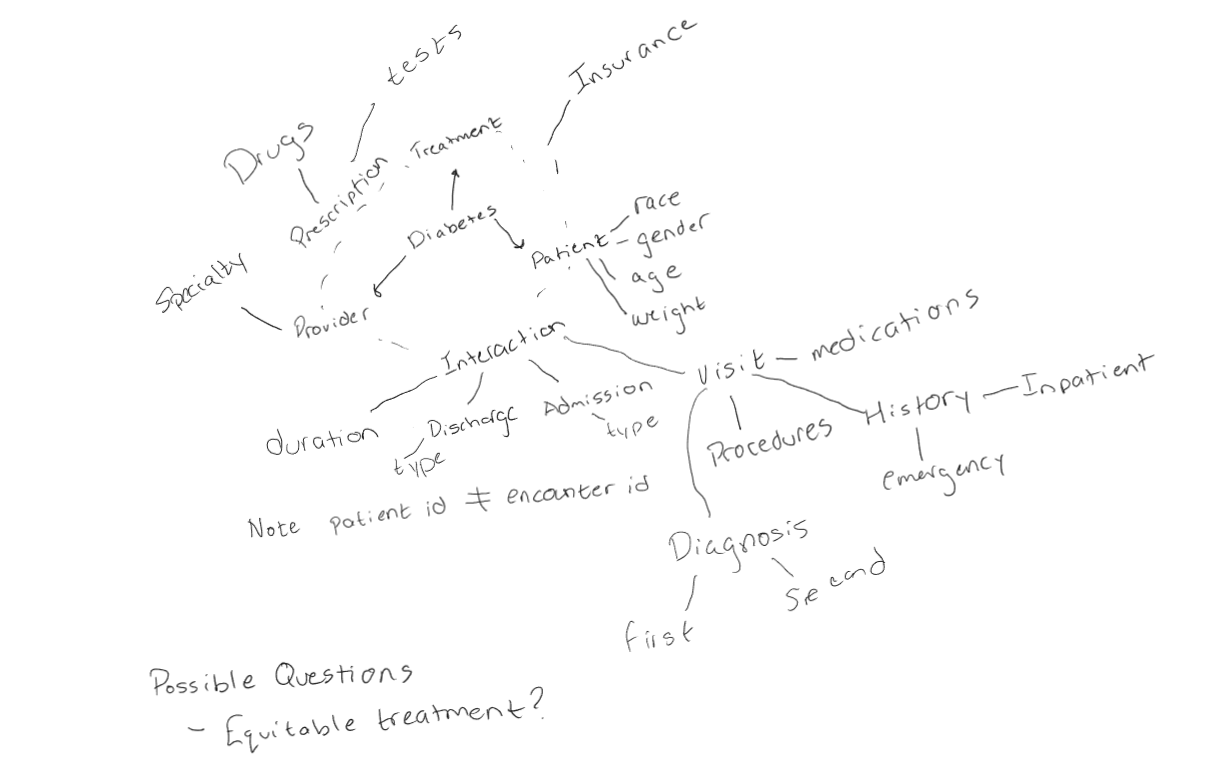

In [ ]:

print(diabetes_df.shape)

diabetes_df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


After looking at this data dictionary and map, we came to a consensus that we wanted to assess how diabetes patients are being treated by using some metric to determine if a patient encounter was successful or a failure. For the sake of this metric we decided that the best metric to determine success or failure was if they were readmitted in 30 days or not, indicating if the patient's treatment was succesful or not. There is some concessions to this point, considering some extreme illnesses having a necessity for immediate readmittance or some chronic illnesses requiring constant checkups, but in general we believe that a patient having early readmittance is usually a bad sign and requires increased costs/resources on both the patient and provider's behalfs.



**2. Creating a "Full Dataset"**

Our goal is to create a classification model to predict if a patient is readmitted or not and use the parameters in that model to see what factors are important in determining a patient's early readmittance. To create that model, we need a full dataset that includes values that can be analyzed and without missingness.

Thus, each variable were assessed to see if we need to impute rows, remove rows, or remove the variable.

**2.1 Dealing with Missigness among Factors**

Firstly, it seems all missing values are defined by a '?' rather than an empty space or period. Secondly, it seems that 'weight' has a missigness that is too high to include making it useless.

Moreover, 'diag1', 'diag2', and 'diag3' are similarly require alot of domian specific knowledge to provide greater value (i.e. determining if a patient has Type 1 or Type II diabetes, etc.). Thus, for the sake of time, they will also be ommitted and possibly looked at with greater scrutiny later.

It was decided, due to time, that we would choose to ommit all missing rows in our chosen variables even versus naive imputation methods. Thus, we just have to ommit rows with missing age values.

Finally, the major conflict is the missingness of 'payer_code' and 'medical_speicalty.' It is a question of optimizing information we would lose by removing variable versus a full dataset with no missing values. Once again due to time, and a lack of information about what each id meant, we chose to omit 'payer_code' (a very interesting variable to look at in the future). Then after removing the missing rows from 'medical_specialty' our dataset had approximately 50,000 rows of non-missing data.

In [ ]:
# 1.5 . Find Amount of Missing Values
for variable in ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'] :
  print("Frequency of " + variable)
  print(diabetes_df[variable].value_counts())

print(diabetes_df['race'].value_counts())

#Percent Missingness
#Race Missingness

print("Missigness of Race")
print("Frequency: " + str(diabetes_df['race'].value_counts()['?']/101766))

print("Missigness of Weight")
print("Frequency: " + str(diabetes_df['weight'].value_counts()['?']/101766))

print("Missigness of Payer Code")
print("Frequency: " + str(diabetes_df['payer_code'].value_counts()['?']/101766))

print("Missigness of Specialty")
print("Frequency: " + str(diabetes_df['medical_specialty'].value_counts()['?']/101766))

print("Missingness of Diag1")
print("Frequency: " + str(diabetes_df['diag_1'].value_counts()['?']/101766))

print("Missingness of Diag2")
print("Frequency: " + str(diabetes_df['diag_2'].value_counts()['?']/101766))

print("Missingness of Diag3")
print("Frequency: " + str(diabetes_df['diag_3'].value_counts()['?']/101766))



Frequency of race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Frequency of weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
Frequency of payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64
Frequency of medical_specialty
?                                       49949
InternalMedicine                        14635
Emergency/Trauma                         7565
Family/GeneralPractice                   7440
Cardiology                               5352
Surgery-General                       

**2.2 Problems with the Age variable**

However, the data's missingness is not the only barrier to analysis. Age is an important variable and it was recorded as a range which loses alot of possible information. To regain some of this information, Age will be treated as a numerical variable wherein the midpoint of each range will replace the range.

This will impact the model positively since more categorical variables will only complicate the results and analysis, but at the same time, this assumption means that a 1 year old would be held with the same weight as a 9 year old which may be a cause for bias.

In [ ]:
#3. Dealing with Categorical Columns: (Age)
#Choosing a midpoint for each Bin.

print("Age Breakdown")
print(diabetes_df['age'].value_counts())

age_num = []
for value in diabetes_df['age']:
  if value == '[90-100)':
    age_num.append((99+90)/2)
  if value == '[80-90)':
    age_num.append((89+80)/2)
  if value == '[70-80)':
    age_num.append((79+70)/2)
  if value == '[60-70)':
    age_num.append((69+60)/2)
  if value == '[50-60)':
    age_num.append((59+50)/2)
  if value == '[40-50)':
    age_num.append((49+40)/2)
  if value == '[30-40)':
    age_num.append((30+39)/2)
  if value == '[20-30)':
    age_num.append((20+29)/2)
  if value == '[10-20)':
    age_num.append((10+19)/2)
  if value == '[0-10)':
    age_num.append((9)/2)

print(len(age_num))

diabetes_df['age_num'] = age_num





Age Breakdown
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
101766


**2.3 Checking Insurance's Relative Value**

While the 'payer_code' value was previously decided to be omitted, this table just looks at a possible feature_engineered variable of 'self_pay' which questions if self-paying for treatment is related to being readmitted in less than 30 days.

Based on the table below, it seems obvious that self-paying for treatment has no obvious bearing on the early readmittance, thus the idea for a binary 'self_pay' variable was rejected. Further feature-engineering while important (and definitely interesting for future analysis) was omitted due to time.


In [ ]:
#4 Dealing with Insurance vs. Readmittance

#Remove msisingness from Readmitted
print("Missingness of Readmitted")
print(diabetes_df['readmitted'].value_counts())

#Create reamitted into two classes for easier classification
Lessthan30 = []
for val in diabetes_df['readmitted']:
  if val == '<30':
    Lessthan30.append("<30")
  else:
    Lessthan30.append("Not <30")

print(len(Lessthan30))
print(diabetes_df['payer_code'].value_counts())

selfpay = []
for val in diabetes_df['payer_code']:
  if val == 'SP':
    selfpay.append("Self Pay")
  else:
    selfpay.append("Either Insured or IDK")

df_test = pd.DataFrame()

df_test['LT3'] = Lessthan30
df_test['SP'] = selfpay

freq_table = pd.crosstab(df_test['LT3'], df_test['SP'])
freq_table

Missingness of Readmitted
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
101766
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


SP,Either Insured or IDK,Self Pay
LT3,,
<30,10847,510
Not <30,85912,4497


**2.4 Finalizing Dataset for Modeling**

During this stage we executed on all of the plans that were made throughout the notebook.

For easier viewing, we sorted the values in the dataset by patient number and then compared patient ids to encounter ids. Since the prediction will be looking at approximatley 50,000 points, it is important to note if those points are related. It is an important possible source of bias to note the fact that some of these datapoints are from the same patient, but the assumption is that the data we are using still provides value even if there are relationships.

In [ ]:
# Removing Unnecessary Variables

diabetes_clean = diabetes_df.drop(['weight'], axis = 1)
diabetes_clean = diabetes_df.drop(['diag_1'], axis = 1)
diabetes_clean = diabetes_df.drop(['diag_2'], axis = 1)
diabetes_clean = diabetes_df.drop(['diag_3'], axis = 1)

#diabetes_clean = diabetes_df.drop(['medical_specialty'], axis = 1)




print(diabetes_clean.shape)

# Remove missing value columns

#CHATGPT

# Replace "?" with NaN for the entire DataFrame
diabetes_clean.replace("?", np.nan, inplace=True)

# Drop "medical_specialty" if it has missing values
diabetes_clean.dropna(subset=['medical_specialty'], inplace=True)
#diabetes_clean.dropna(subset=['payer_code'], inplace=True)

#diabetes_clean.sort_values(by = 'patient_nbr', ascending = True)
print(diabetes_clean.head(10))
print(diabetes_clean.shape)

# Check the length
print(len(diabetes_clean['patient_nbr'].unique()))
print(len(diabetes_clean['encounter_id'].unique()))



# GPT
# Find correlation between medications and readmittance

medications = [
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'insulin',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

# Calculate the correlation between "readmitted" and the specified columns
corr = diabetes_clean[['readmitted'] + medications].corr(numeric_only=True)



corr.style.background_gradient(cmap ='coolwarm')

diabetes_clean['readmitted'].value_counts()["NO"]


(101766, 50)
    encounter_id  patient_nbr       race  gender       age weight  \
0        2278392      8222157  Caucasian  Female    [0-10)    NaN   
9          15738     63555939  Caucasian  Female  [90-100)    NaN   
12         40926     85504905  Caucasian  Female   [40-50)    NaN   
13         42570     77586282  Caucasian    Male   [80-90)    NaN   
17         84222    108662661  Caucasian  Female   [50-60)    NaN   
26        236316     40523301  Caucasian    Male   [80-90)    NaN   
27        248916    115196778  Caucasian  Female   [50-60)    NaN   
29        252822     18196434  Caucasian  Female   [80-90)    NaN   
32        260166     80845353  Caucasian  Female   [70-80)    NaN   
35        325848     63023292  Caucasian  Female   [60-70)    NaN   

    admission_type_id  discharge_disposition_id  admission_source_id  \
0                   6                        25                    1   
9                   3                         3                    4   
12         

28912

In [ ]:
diabetes_clean.to_csv('diabetes_clean.csv')